In [41]:
#pip install nltk
#pip install textblob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from nltk.corpus import stopwords
from textblob import TextBlob

In [44]:
data=pd.read_csv('C:\\Users\\pradyumn\\Documents\\Assignment\\Elon_musk.csv',encoding="latin-1")
data

,Unnamed: 0,Text
0,1,@kunalb11 Im an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [50]:
data['word_count'] = data['Text'].apply(lambda x: len(str(x).split(" ")))
data[['Text','word_count']].head(10)

,Text,word_count
0,@kunalb11 Im an alien,4
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,13
2,@joerogan @Spotify Great interview!,4
3,@gtera27 Doge is underestimated,4
4,@teslacn Congratulations Tesla China for amazi...,17
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,7
6,"Frodo was the underdoge,\nAll thought he would...",12
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,11
9,The most entertaining outcome is the most likely,8


In [47]:
data['char_count'] = data['Text'].str.len()
data[['Text','char_count']].head(10)

,Text,char_count
0,@kunalb11 Im an alien,22
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,82
2,@joerogan @Spotify Great interview!,35
3,@gtera27 Doge is underestimated,31
4,@teslacn Congratulations Tesla China for amazi...,104
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,49
6,"Frodo was the underdoge,\nAll thought he would...",96
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),46
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,89
9,The most entertaining outcome is the most likely,48


In [51]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))
data['avg_word'] = data['Text'].apply(lambda x: avg_word(x))
data[['Text','avg_word']].head(10)

,Text,avg_word
0,@kunalb11 Im an alien,4.750000
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,5.384615
2,@joerogan @Spotify Great interview!,8.000000
3,@gtera27 Doge is underestimated,7.000000
4,@teslacn Congratulations Tesla China for amazi...,5.176471
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,6.142857
6,"Frodo was the underdoge,\nAll thought he would...",5.928571
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),6.833333
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,7.181818
9,The most entertaining outcome is the most likely,5.125000


In [52]:
import nltk
nltk.download('stopwords')
stop = stopwords.words('english')
data['stopwords'] = data['Text'].apply(lambda x: len([x for x in x.split() if x in stop]))
data[['Text','stopwords']].head(10)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pradyumn\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Text,stopwords
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,4
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,5
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,2
6,"Frodo was the underdoge,\nAll thought he would...",5
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,2
9,The most entertaining outcome is the most likely,4


In [53]:
data['hastags'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.startswith('@')]))
data[['Text','hastags']].head(10)

,Text,hastags
0,@kunalb11 Im an alien,1
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,1
2,@joerogan @Spotify Great interview!,2
3,@gtera27 Doge is underestimated,1
4,@teslacn Congratulations Tesla China for amazi...,1
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),3
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,2
9,The most entertaining outcome is the most likely,0


In [54]:
data['numerics'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
data[['Text','numerics']].head(10)

,Text,numerics
0,@kunalb11 Im an alien,0
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,0
2,@joerogan @Spotify Great interview!,0
3,@gtera27 Doge is underestimated,0
4,@teslacn Congratulations Tesla China for amazi...,0
5,Happy New Year of the Ox! https://t.co/9WFKMYu2oj,0
6,"Frodo was the underdoge,\nAll thought he would...",0
7,@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :),0
8,@flcnhvy @anonyx10 Indeed! Tweets definitely d...,0
9,The most entertaining outcome is the most likely,0


In [88]:
data['upper'] = data['Text'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
data[['Text','upper']].head(10)

,Text,upper
0,kunalb11 im alien,0
1,ray tracing cyberpunk hdr nextlevel tried,0
2,joerogan spotify interview,0
3,gtera27 doge underestimated,0
4,teslacn congratulation china amazing execution...,0
5,happy year ox httpstco9wfkmyu2oj,0
6,frodo underdoge thought fail httpstcozgxjfdzzrm,0
7,owensparks_ anonyx10 thanks,0
8,anonyx10 indeed tweet definitely represent rea...,0
9,entertaining outcome likely,0


In [89]:
data['Text'] = data['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Text'].head()

0                                    kunalb11 im alien
1            ray tracing cyberpunk hdr nextlevel tried
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [90]:
data['Text'] = data['Text'].str.replace('[^\w\s]','')
data['Text'].head()

C:\Users\pradyumn\AppData\Local\Temp\ipykernel_11528\1947507549.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Text'] = data['Text'].str.replace('[^\w\s]','')


0                                    kunalb11 im alien
1            ray tracing cyberpunk hdr nextlevel tried
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [91]:
stop = stopwords.words('english')
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Text'].head()

0                                    kunalb11 im alien
1            ray tracing cyberpunk hdr nextlevel tried
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [92]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[:10]
freq

year        48
day         38
engine      36
time        36
nasa        33
car         31
flight      31
starship    31
high        30
falcon      29
dtype: int64

In [93]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1            ray tracing cyberpunk hdr nextlevel tried
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [94]:
freq = pd.Series(' '.join(data['Text']).split()).value_counts()[-10:]
freq

attractive            1
employer              1
student               1
httpstcokknyqlet0o    1
cape                  1
httpstcouzcgikcikb    1
cardoso               1
luck                  1
superpower            1
samwise               1
dtype: int64

In [95]:
freq = list(freq.index)
data['Text'] = data['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Text'].head()

0                                    kunalb11 im alien
1            ray tracing cyberpunk hdr nextlevel tried
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [96]:
data['Text'][:5].apply(lambda x: str(TextBlob(x).correct()))

0                                    kunalb11 in alien
1            ray tracing cyberpunk her nextlevel tried
2                           joerogan specify interview
3                          gtera27 done underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [97]:
import nltk
nltk.download('punkt')
TextBlob(data['Text'][1]).words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pradyumn\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


WordList(['ray', 'tracing', 'cyberpunk', 'hdr', 'nextlevel', 'tried'])

In [98]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Text'][:5].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0                                    kunalb11 im alien
1                ray trace cyberpunk hdr nextlevel tri
2                           joerogan spotifi interview
3                              gtera27 doge underestim
4    teslacn congratul china amaz execut last next ...
Name: Text, dtype: object

In [99]:
from textblob import Word
import nltk
nltk.download('wordnet')
data['Text'] = data['Text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pradyumn\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0                                    kunalb11 im alien
1            ray tracing cyberpunk hdr nextlevel tried
2                           joerogan spotify interview
3                          gtera27 doge underestimated
4    teslacn congratulation china amazing execution...
Name: Text, dtype: object

In [100]:
TextBlob(data['Text'][0]).ngrams(2)

[WordList(['kunalb11', 'im']), WordList(['im', 'alien'])]

In [101]:
tf1 = (data['Text'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,ray,1
1,tracing,1
2,cyberpunk,1
3,hdr,1
4,nextlevel,1
5,tried,1


In [102]:
for i,word in enumerate(tf1['words']):
 tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Text'].str.contains(word)])))
tf1

,words,tf,idf
0,ray,1,5.035453
1,tracing,1,7.600402
2,cyberpunk,1,5.115496
3,hdr,1,6.907255
4,nextlevel,1,6.907255
5,tried,1,5.808643


In [103]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,ray,1,5.035453,5.035453
1,tracing,1,7.600402,7.600402
2,cyberpunk,1,5.115496,5.115496
3,hdr,1,6.907255,6.907255
4,nextlevel,1,6.907255,6.907255
5,tried,1,5.808643,5.808643


In [104]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
stop_words= 'english',ngram_range=(1,1))
vect = tfidf.fit_transform(data['Text'])
vect

<1999x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 6150 stored elements in Compressed Sparse Row format>

# Bag of words

In [105]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Text'])
data_bow

<1999x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 6630 stored elements in Compressed Sparse Row format>

# Sentiment Analysis

In [106]:
data['Text'][:5].apply(lambda x: TextBlob(x).sentiment)

0                                 (-0.25, 0.75)
1                                    (0.0, 0.0)
2                                    (0.0, 0.0)
3                                    (0.0, 0.0)
4    (0.20000000000000004, 0.32222222222222224)
Name: Text, dtype: object

In [107]:
data['sentiment'] = data['Text'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Text','sentiment']].head(10)

,Text,sentiment
0,kunalb11 im alien,-0.25
1,ray tracing cyberpunk hdr nextlevel tried,0.00
2,joerogan spotify interview,0.00
3,gtera27 doge underestimated,0.00
4,teslacn congratulation china amazing execution...,0.20
5,happy ox httpstco9wfkmyu2oj,0.80
6,frodo underdoge thought fail httpstcozgxjfdzzrm,-0.50
7,owensparks_ anonyx10 thanks,0.20
8,anonyx10 indeed tweet definitely represent rea...,0.00
9,entertaining outcome likely,0.25


In [108]:
from wordcloud import WordCloud, STOPWORDS
def plot_cloud(wordcloud):
    plt.figure(figsize=(40, 30))
    plt.imshow(wordcloud) 
    plt.axis("off");stopwords = STOPWORDS

<Axes: title={'center': 'Sentence sentiment value to sentence word count'}, xlabel='word_count', ylabel='sentiment'>

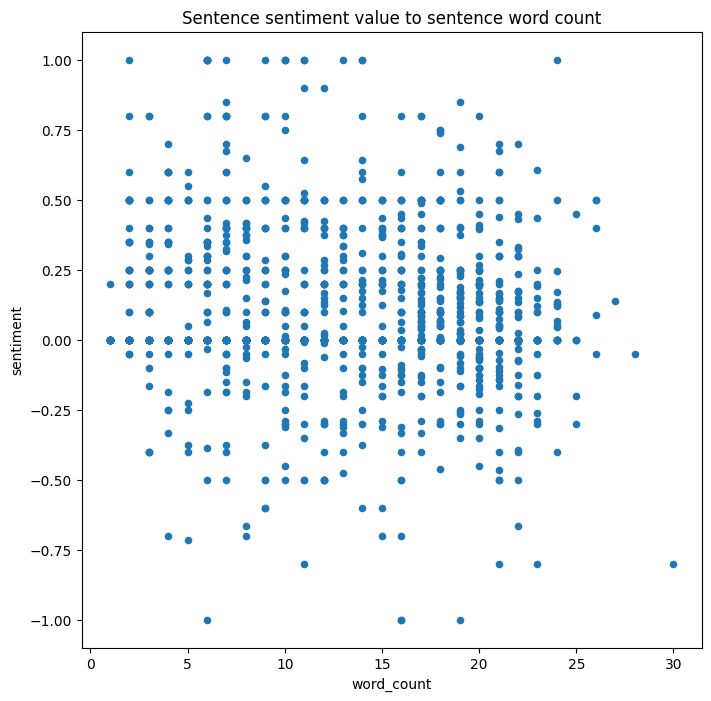

In [109]:
data.plot.scatter(x='word_count',y='sentiment',figsize=(8,8),title='Sentence sentiment value to sentence word count')